<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        FAANG Layoffs❗❗
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Predicting the layoff possibility of Tech 💻 employees
            <br>
       </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>Baddag Mohamed</li>
         <li>Baggar Nassim</li>
         <li>Boukhris Imane</li>
         <li>Sbai Achraf</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>Mr. El Hamlaoui Mahmoud</li>
      </ul>
</div>


<p style="font-size:2em">📜 Table of Content:</p><br>
<div style="font-size:1.5em">
    <ul>
        <li>
          <a href="#intro">Introduction 🧾</a>
       </li><br>
       <li>
          <a href="#pre-processing">Prepare a dataset 📂</a>
       </li><br>
        <li>
          <a href="#eda"> EDA 🔎</a>
       </li><br>
            <li>
          <a href="#ftr-eng"> Feature Engineering 🏗️</a>
       </li><br>
        <li>
          <a href="#prepro">Preprocessing ⚙️</a>
       </li><br>
       <li>
          <a href="#model-building">Building models 🛠️</a>
       </li><br>
       <li>
          <a href="#model-eval">Models Comparison 📉</a>
       </li><br> 
               <li>
          <a href="#model-prod">Model to Production 👷‍</a>
       </li><br> 
    </ul>
</div>

<div id="intro">
        <h1 style="color:#1a1a1a">
         Introduction 🧾
        </h1>
</div>

<h4 style="color:grey"> Importing Liberaries</h4>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<div id="pre-processing">
        <h1 style="color:#1a1a1a">
            Prepare a dataset 📂
        </h1>
</div>

<h4 style="color:grey"> Importing the data that we have scraped in a csv format</h4>

In [2]:
dataset = pd.read_csv("../FAANG.csv")

In [3]:
# head() function takes the number of lines you wanna show as an argument
dataset.head(8)

,Name,Headline,Location,Company,Company_Months,Work_Months,Laidoff
0,Jillian James,Software Engineer,Nevada,Meta,38,273,False
1,Daniel Nguyen,Software Engineer,Arizona,Meta,141,213,False
2,Samantha Robertson,Project Manager,Minnesota,Meta,138,341,False
3,Antonio Hernandez,Data Engineer,Maryland,Meta,134,213,False
4,Sarah Whitney,Data Analyst,Indiana,Meta,193,337,False
5,Nicholas Holloway,Program Manager,Iowa,Meta,130,334,False
6,Heather Saunders,Data Analyst,Vermont,Meta,72,309,False
7,Edgar Shields,Data Analyst,North Carolina,Meta,135,160,False


In [4]:
# dataset shape
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1852 rows and 7 columns


<div id="eda">
        <h1 style="color:#1a1a1a">
              EDA 🔎
        </h1>
</div>

In [5]:
# info() 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1852 non-null   object
 1   Headline        1852 non-null   object
 2   Location        1852 non-null   object
 3   Company         1852 non-null   object
 4   Company_Months  1852 non-null   int64 
 5   Work_Months     1852 non-null   int64 
 6   Laidoff         1852 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 88.7+ KB


In [6]:
# describe() function gives a disc of all the columns
dataset.describe()

,Company_Months,Work_Months
count,1852.000000,1852.000000
mean,119.814795,238.386069
std,69.050070,81.245149
min,1.000000,11.000000
25%,61.000000,188.000000
50%,119.000000,249.500000
75%,180.000000,303.000000
max,239.000000,359.000000


In [7]:
# isnull() checking the null values
dataset.isnull().sum()

Name              0
Headline          0
Location          0
Company           0
Company_Months    0
Work_Months       0
Laidoff           0
dtype: int64

In [8]:
# function to plot hist
def histogram(var):
    plt.figure(figsize = (10,5))
    plt.hist(dataset[var], bins=40)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("histogram of "+var)
    plt.show()

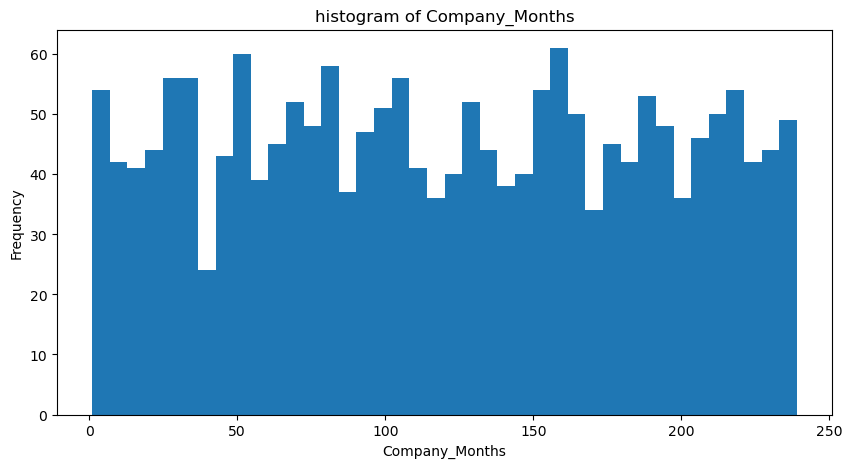

In [9]:
histogram("Company_Months")

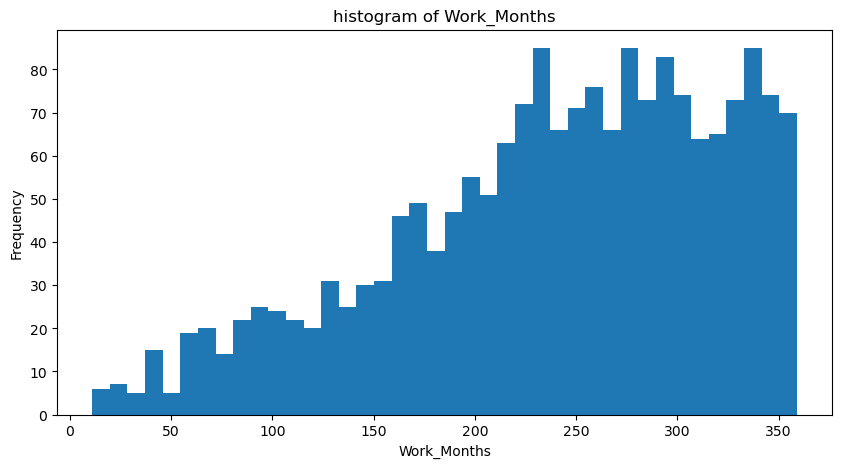

In [10]:
histogram("Work_Months")

In [11]:
def bar(var_name):
    plt.figure(figsize=(7,7))
    counted_values = dataset[var_name].value_counts()

    plt.bar(counted_values.index, counted_values)
    plt.xlabel(var_name)
    plt.ylabel("number")
    plt.title("frequncy of "+var_name)
    


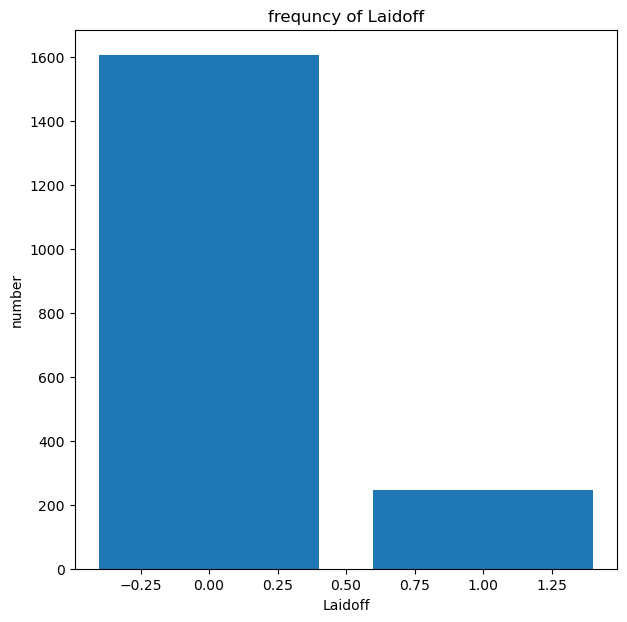

In [12]:
bar("Laidoff")

In [13]:
# correlation between Headline and Laidoff
df_2_col = dataset[['Headline','Laidoff']]
df_2_col.groupby(["Headline"], as_index=False).mean()

,Headline,Laidoff
0,3D Artist,0.094972
1,Associate General Counsel Data Protection,0.173611
2,Data Analyst,0.102703
3,Data Engineer,0.118012
4,Data Scientist,0.138889
5,Data Scientist,0.136095
6,Machine Learning Engineer,0.128049
7,Product Manager,0.099010
8,Program Manager,0.222892
9,Project Manager,0.123457


In [14]:
# the most laidoff job title
df_2_col.groupby(["Headline"], as_index=False).mean().sort_values(by=['Laidoff'], ascending=False)

,Headline,Laidoff
8,Program Manager,0.222892
1,Associate General Counsel Data Protection,0.173611
10,Software Engineer,0.142045
4,Data Scientist,0.138889
5,Data Scientist,0.136095
6,Machine Learning Engineer,0.128049
9,Project Manager,0.123457
3,Data Engineer,0.118012
2,Data Analyst,0.102703
7,Product Manager,0.099010


<div id="ftr-eng">
        <h1 style="color:#1a1a1a">
              Feature Engineering 🏗️
        </h1>
</div>

In [15]:
data_cleaned = dataset.drop(axis=1, labels=["Name", "Company"])

In [16]:
data_cleaned

,Headline,Location,Company_Months,Work_Months,Laidoff
0,Software Engineer,Nevada,38,273,False
1,Software Engineer,Arizona,141,213,False
2,Project Manager,Minnesota,138,341,False
3,Data Engineer,Maryland,134,213,False
4,Data Analyst,Indiana,193,337,False
...,...,...,...,...,...
1847,Product Manager,Washington,204,233,False
1848,Data Scientist,Kentucky,224,296,False
1849,Data Engineer,Washington,192,205,False
1850,Program Manager,Michigan,36,97,True


In [17]:
numerical_data = data_cleaned.select_dtypes(include =['int64','float64'])
numerical_data.head()

,Company_Months,Work_Months
0,38,273
1,141,213
2,138,341
3,134,213
4,193,337


<Figure size 3000x3000 with 0 Axes>

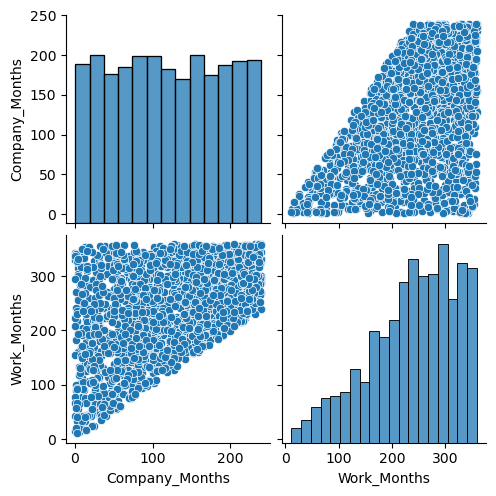

In [18]:
plt.figure(figsize = (30,30))
sns.pairplot(numerical_data)
plt.show()

As there are lot of columns- we can't make out really much from above graph. Let us check the correlation.

In [19]:
categorical_cols = data_cleaned.select_dtypes(include = ['object','bool'])
categorical_cols.head()

,Headline,Location,Laidoff
0,Software Engineer,Nevada,False
1,Software Engineer,Arizona,False
2,Project Manager,Minnesota,False
3,Data Engineer,Maryland,False
4,Data Analyst,Indiana,False


In [20]:
#creating dummies for categorical data
headline_df = categorical_cols.Headline

In [21]:
headline_dict = {}
for i,item in enumerate(headline_df.unique()):
    headline_dict[item] = i+1


In [22]:
headline_dict

{'Software Engineer ': 1,
 'Project Manager ': 2,
 'Data Engineer': 3,
 'Data Analyst': 4,
 'Program Manager': 5,
 '3D Artist': 6,
 'Product Manager': 7,
 'Data Scientist': 8,
 'Machine Learning Engineer': 9,
 'Data Scientist ': 10,
 'Associate General Counsel Data Protection': 11}

In [23]:
#creating dummies for categorical data
location_df = categorical_cols.Location

In [24]:
location_dict = {}
for i,item in enumerate(location_df.unique()):
    location_dict[item] = i+1


In [25]:
location_dict

{'Nevada': 1,
 'Arizona': 2,
 'Minnesota': 3,
 'Maryland': 4,
 'Indiana': 5,
 'Iowa': 6,
 'Vermont': 7,
 'North Carolina': 8,
 'Missouri': 9,
 'Alaska': 10,
 'South Carolina': 11,
 'New Jersey': 12,
 'Colorado': 13,
 'Connecticut': 14,
 'Wyoming': 15,
 'Maine': 16,
 'Kentucky': 17,
 'Oklahoma': 18,
 'Texas': 19,
 'District of Columbia': 20,
 'Michigan': 21,
 'Massachusetts': 22,
 'Rhode Island': 23,
 'Illinois': 24,
 'Delaware': 25,
 'Pennsylvania': 26,
 'Kansas': 27,
 'Hawaii': 28,
 'Oregon': 29,
 'Alabama': 30,
 'Ohio': 31,
 'New Mexico': 32,
 'Washington': 33,
 'California': 34,
 'Montana': 35,
 'Virginia': 36,
 'Idaho': 37,
 'West Virginia': 38,
 'Arkansas': 39,
 'Wisconsin': 40,
 'Louisiana': 41,
 'Georgia': 42,
 'Mississippi': 43,
 'North Dakota': 44,
 'Tennessee': 45,
 'New Hampshire': 46,
 'South Dakota': 47,
 'New York': 48,
 'Florida': 49,
 'Utah': 50,
 'Nebraska': 51}

In [26]:
categorical_cols["Headline"] = categorical_cols["Headline"].apply(lambda x: headline_dict[x])

In [27]:
categorical_cols["Headline"]

0       1
1       1
2       2
3       3
4       4
       ..
1847    7
1848    8
1849    3
1850    5
1851    8
Name: Headline, Length: 1852, dtype: int64

In [28]:
categorical_cols["Location"] = categorical_cols["Location"].apply(lambda x: location_dict[x])

In [29]:
categorical_cols["Location"]

0        1
1        2
2        3
3        4
4        5
        ..
1847    33
1848    17
1849    33
1850    21
1851    16
Name: Location, Length: 1852, dtype: int64

In [30]:
all_data  = pd.concat([numerical_data, categorical_cols], axis =1)

In [31]:
all_data

,Company_Months,Work_Months,Headline,Location,Laidoff
0,38,273,1,1,False
1,141,213,1,2,False
2,138,341,2,3,False
3,134,213,3,4,False
4,193,337,4,5,False
...,...,...,...,...,...
1847,204,233,7,33,False
1848,224,296,8,17,False
1849,192,205,3,33,False
1850,36,97,5,21,True


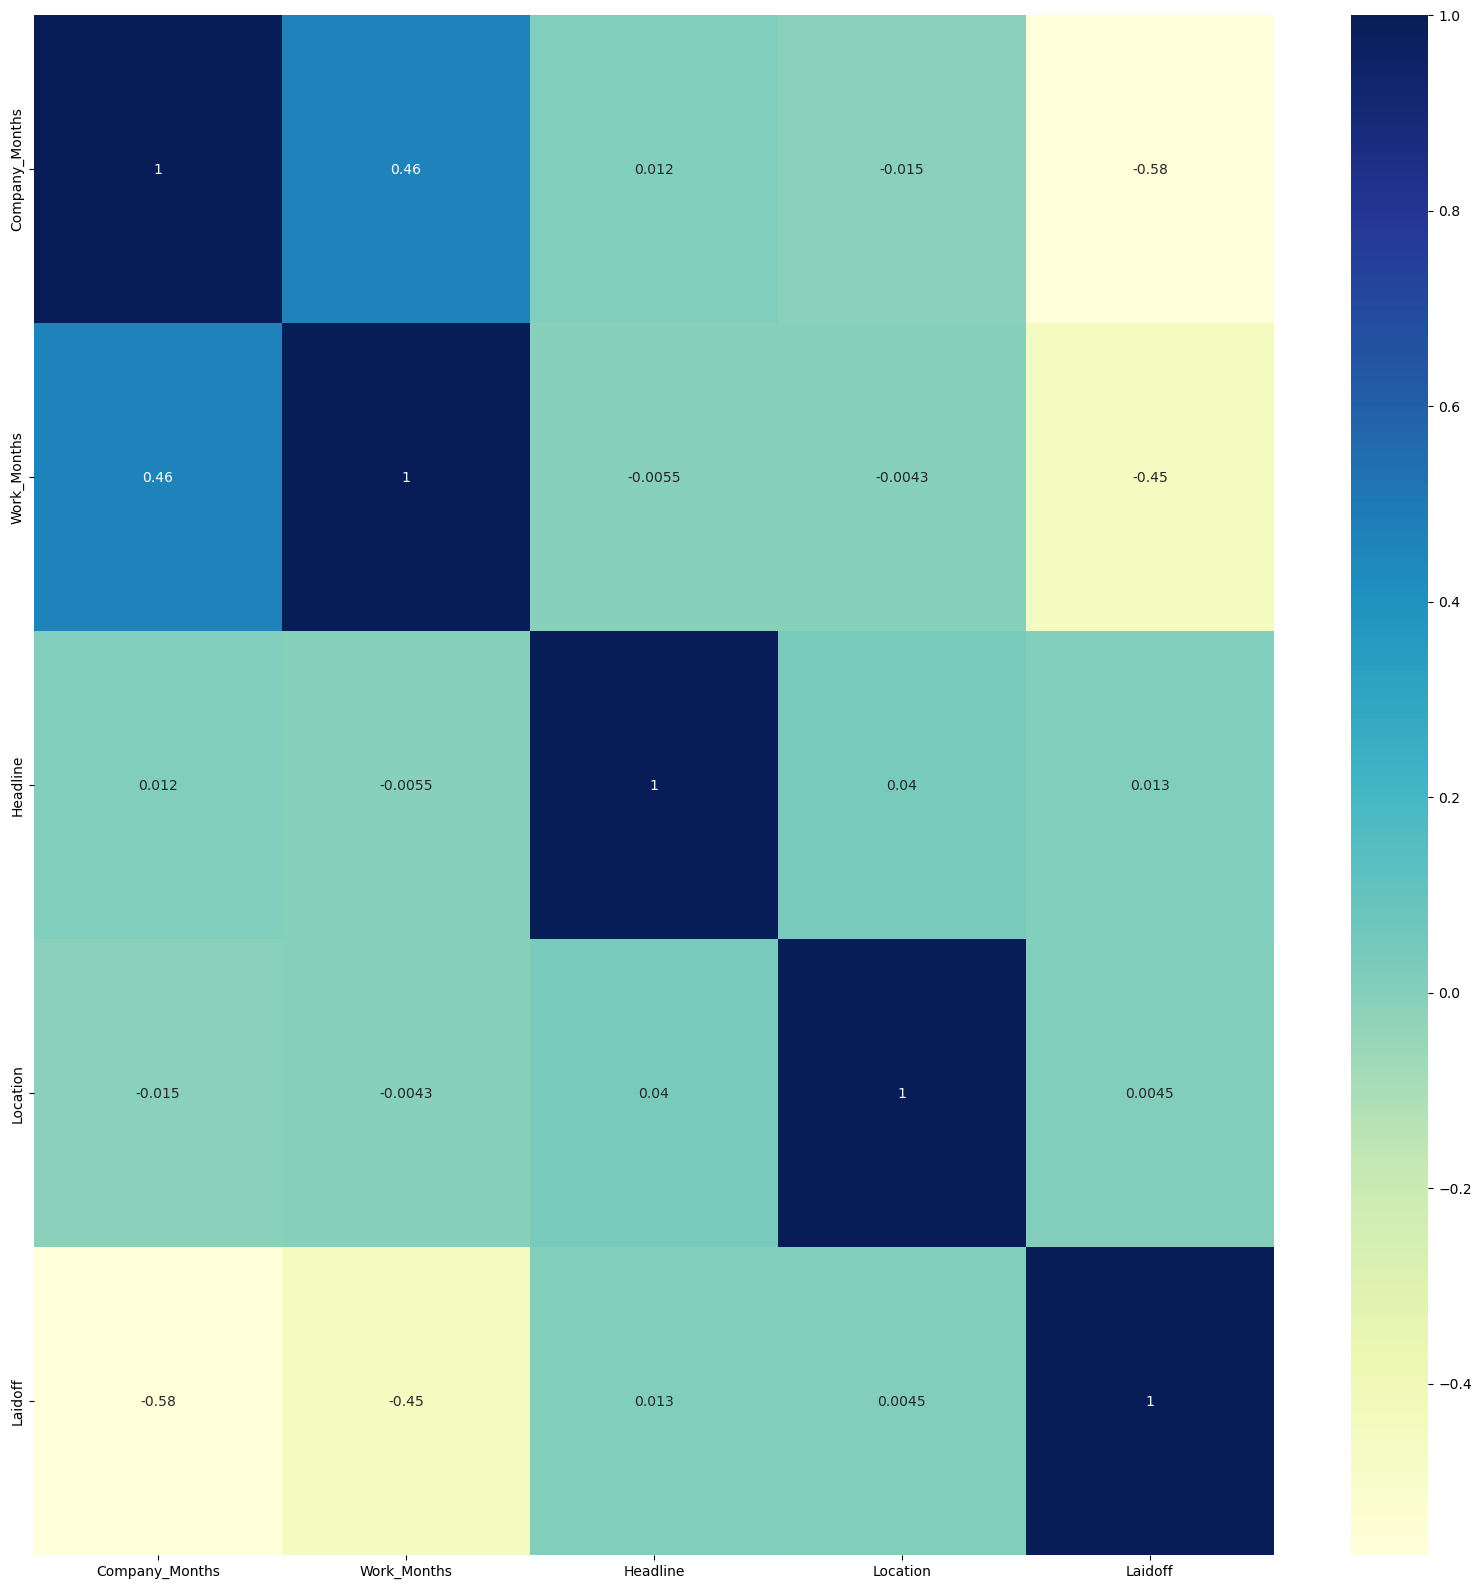

In [32]:
plt.figure(figsize = (20,20))
sns.heatmap(all_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

<div id="prepro">
        <h1 style="color:#1a1a1a">
         Preprocessing ⚙️
        </h1>
</div>

<h4 style="color:grey"> Importing Liberaries</h4>

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
# training_data -> attributes, target -> diabetes
training_data = all_data.drop(['Laidoff'], axis=1)
target = all_data[['Laidoff']]

X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=10)

In [35]:
print('the number of training entries is: ', X_train.shape[0])
print('the number of testing entries is: ', X_test.shape[0])

the number of training entries is:  1481
the number of testing entries is:  371


In [36]:
# y_train values:
y_train.value_counts()

Laidoff
False      1291
True        190
dtype: int64

In [37]:
# y_test values:
y_test.value_counts()

Laidoff
False      315
True        56
dtype: int64

In [38]:
def confusion(y_test, y_pred):
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
    print('\nConfusion Matrix:')
    print(conf)
    return conf

<div id="model-building">
        <h1 style="color:#1a1a1a">
         Building models 🛠️
        </h1>
</div>

### XGBClassifier

In [42]:
from xgboost import XGBClassifier


mscore=[]
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

mscore.append(['XGBClassifier', accuracy])

confusion(y_test, y_pred)


Accuracy: 98.65%

Confusion Matrix:
     0   1
0  314   1
1    4  52


,0,1
0,314,1
1,4,52


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('\nAccuracy Score: '+str(clf.score(X_test, y_test)*100)+"%")

mscore.append(['Logistic Regression', clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)


Accuracy Score: 99.73045822102425%
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       315
        True       1.00      0.98      0.99        56

    accuracy                           1.00       371
   macro avg       1.00      0.99      0.99       371
weighted avg       1.00      1.00      1.00       371


Confusion Matrix:
     0   1
0  315   0
1    1  55


,0,1
0,315,0
1,1,55


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print("\nAccuracy Score: %.2f%%" % float(rnd_clf.score(X_test, y_test)*100))


mscore.append(['Random Forest', rnd_clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)


Accuracy Score: 98.92%
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       315
        True       0.96      0.96      0.96        56

    accuracy                           0.99       371
   macro avg       0.98      0.98      0.98       371
weighted avg       0.99      0.99      0.99       371


Confusion Matrix:
     0   1
0  313   2
1    2  54


,0,1
0,313,2
1,2,54


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, random_state=11)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print("\nAccuracy Score: %.2f%%" % float(gbc.score(X_test, y_test)*100))

mscore.append(['GradientBoosting', gbc.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)


Accuracy Score: 98.65%
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       315
        True       0.96      0.95      0.95        56

    accuracy                           0.99       371
   macro avg       0.98      0.97      0.97       371
weighted avg       0.99      0.99      0.99       371


Confusion Matrix:
     0   1
0  313   2
1    3  53


,0,1
0,313,2
1,3,53


### AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=30, random_state=11)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("\nAccuracy Score: %.2f%%" % float(ada.score(X_test, y_test)*100))

mscore.append(['Adaptive Boosting', ada.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)


Accuracy Score: 94.88%
              precision    recall  f1-score   support

       False       0.99      0.95      0.97       315
        True       0.78      0.93      0.85        56

    accuracy                           0.95       371
   macro avg       0.88      0.94      0.91       371
weighted avg       0.96      0.95      0.95       371


Confusion Matrix:
     0   1
0  300  15
1    4  52


,0,1
0,300,15
1,4,52


### SVM

In [47]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='sigmoid', gamma='auto', random_state=11)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print("\nAccuracy Score: %.2f%%" % float(svm_clf.score(X_test, y_test)*100))# In[ ]:

mscore.append(['SVM', svm_clf.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)


Accuracy Score: 84.91%
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       315
        True       0.00      0.00      0.00        56

    accuracy                           0.85       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.72      0.85      0.78       371


Confusion Matrix:
     0  1
0  315  0
1   56  0


,0,1
0,315,0
1,56,0


<div id="model-eval">
        <h1 style="color:#1a1a1a">
        Model Comparison 📉
        </h1>
</div>

In [48]:
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

[['Logistic Regression', 0.9973045822102425],
 ['Random Forest', 0.9892183288409704],
 ['XGBClassifier', 0.9865229110512129],
 ['GradientBoosting', 0.9865229110512129],
 ['Adaptive Boosting', 0.9487870619946092],
 ['SVM', 0.8490566037735849]]

Accracy Score: 

Logistic Regression: 99.73%
Random Forest: 98.92%
XGBClassifier: 98.65%
GradientBoosting: 98.65%
Adaptive Boosting: 94.88%
SVM: 84.91%


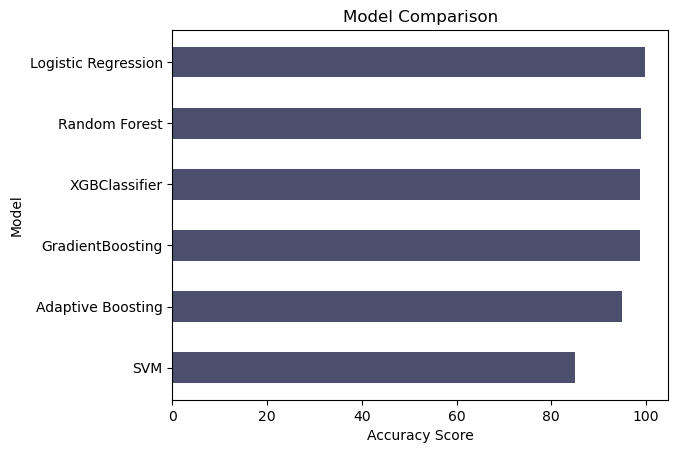

In [49]:
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')
  
 
# creating horizontal bar plot
plt.barh(model, score, height = 0.5, color='#4B4E6D') # this color is called independence, how cool!
 
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()

<div id="model-prod">
        <h1 style="color:#1a1a1a">
         Models to Production 👷‍
        </h1>
</div>

In [50]:
import joblib

# save the models to disk
joblib.dump(clf, "./Models/LR.sav")# load the models from disk
joblib.dump(rnd_clf, "./Models/RF_CLF.sav")
joblib.dump(model, "./Models/XGB.sav")
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load("./Models/LR.sav")
result = loaded_model.score(X_test, y_test)
print(result)

0.9973045822102425
